### Algorithme des $k$-moyennes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


On donne la fonction suivante :

In [2]:
def generate(n,mx,sx,my,sy,alpha):
    X = np.random.randn(n*2).reshape((n,2))
    X = X*np.array([sx,sy])
    r = np.array([[np.cos(alpha), -np.sin(alpha)],[np.sin(alpha),np.cos(alpha)]])
    X = X@r
    X = X+np.array([mx,my])
    return X

Interprétez son code. 

Testez-là en visualisant le nuage de points qu'elle produit en faisant varier ses paramètres.

Déduisez-en le rôle des paramètres.

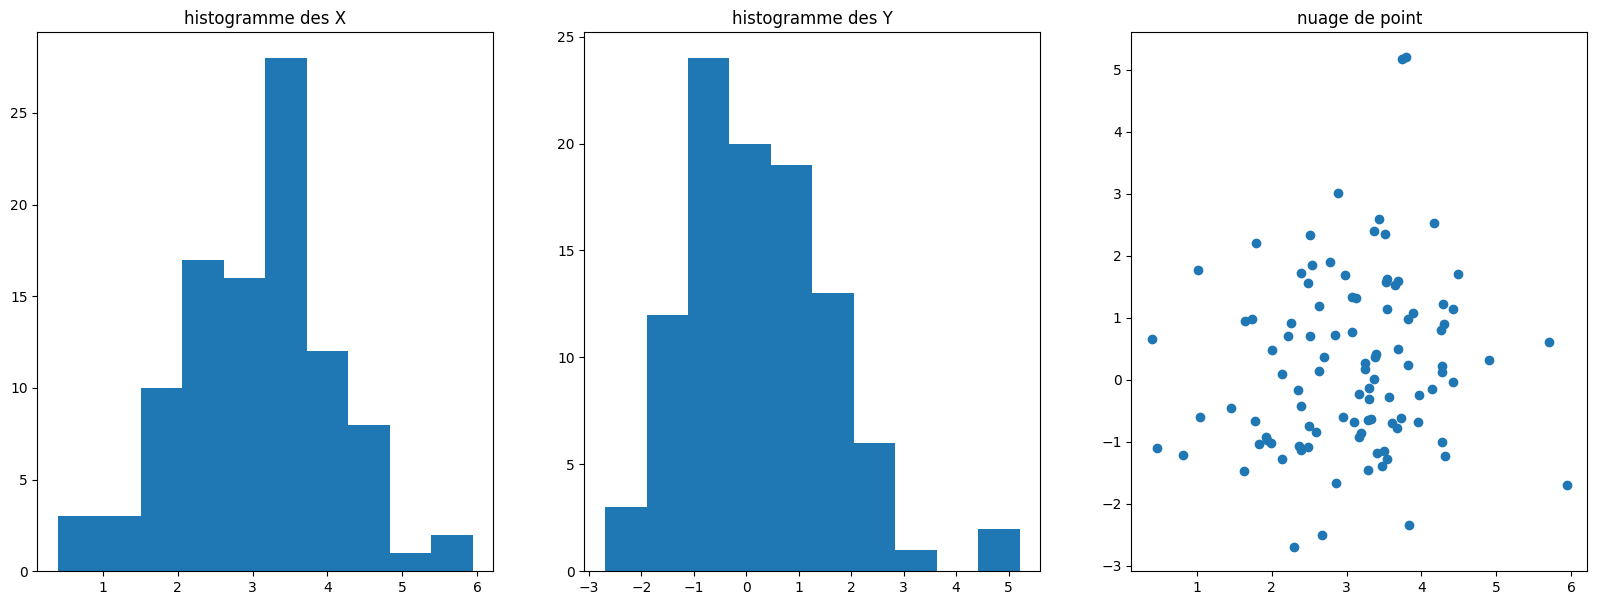

In [10]:
# Utilisez cette cellule pour tester l'exécution de la fonction generate
points = generate(100, 3, 1, .5, 1.5, 0)


plt.figure(figsize=(20, 7))
plt.subplot(131)
plt.title("histogramme des X")
plt.hist(x=points[:, 0])

plt.subplot(132)
plt.title("histogramme des Y")
plt.hist(x=points[:, 1])

plt.subplot(133)
plt.title("nuage de point")
plt.scatter(x=points[:,0], y=points[:,1])

Effet de l'angle

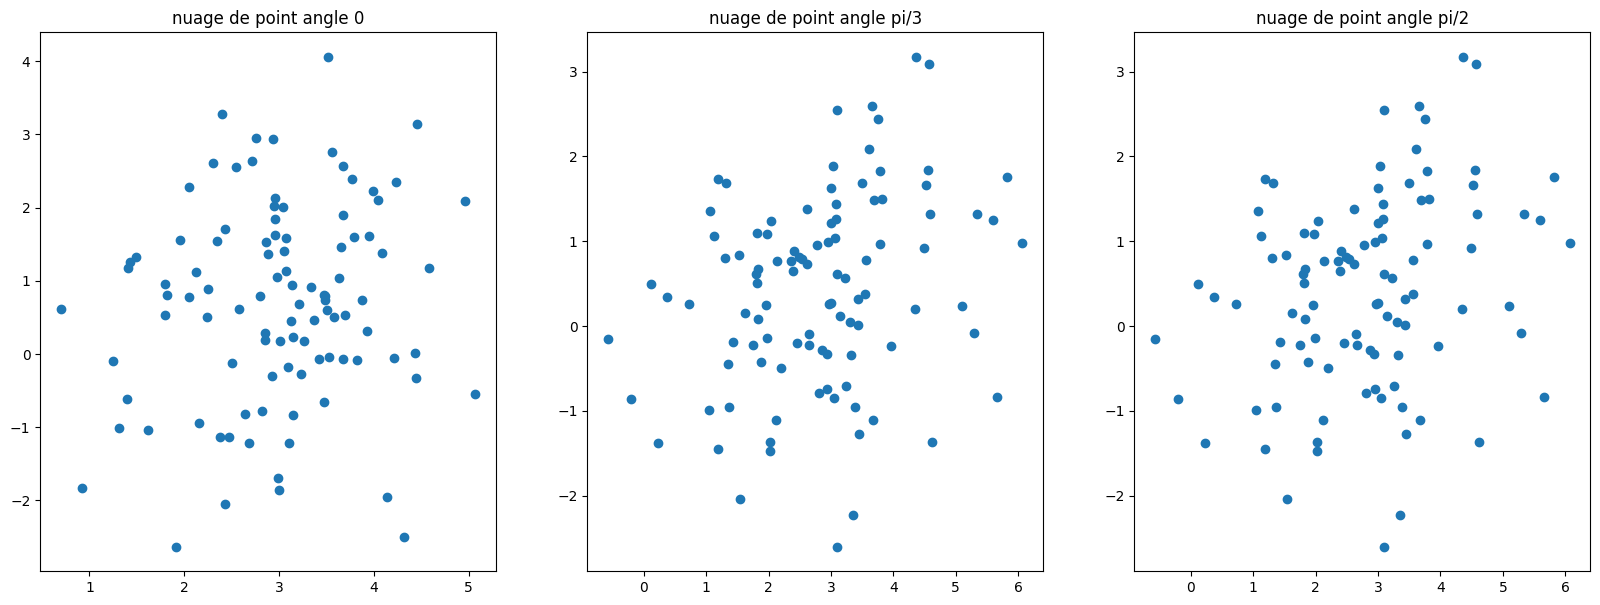

In [13]:


points_0 = generate(100, 3, 1, .5, 1.5, 0)
points_1 = generate(100, 3, 1, .5, 1.5, np.pi/3)

points_2 = generate(100, 3, 1, .5, 1.5, np.pi/2)

plt.figure(figsize=(20, 7))

plt.subplot(131)
plt.title("nuage de point angle 0")
plt.scatter(x=points_0[:,0], y=points_0[:,1])

plt.subplot(132)
plt.title("nuage de point angle pi/3" )
plt.scatter(x=points_1[:,0], y=points_1[:,1])

plt.subplot(133)
plt.title("nuage de point angle pi/2" )
plt.scatter(x=points_1[:,0], y=points_1[:,1])


Dans cette cellule, expliquez le fonctionnement de la fonction `generate` et indiquez la signification de ses paramètres.

## Constitution d'un jeu de données

In [31]:
X1 = generate(30,0,.7,7,.2,np.pi/3)
X2 = generate(30,-3,1,-4,.4,-np.pi/4)
X3 = generate(30,7,2,0,0.3,np.pi/4)

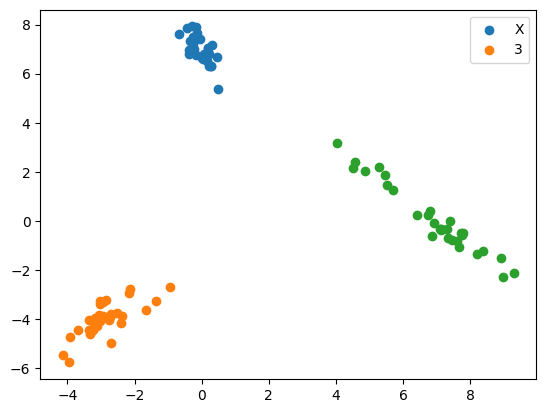

In [32]:
plt.figure()
plt.legend("X1")
plt.scatter(X1[:,0],X1[:,1])
plt.legend("X2")
plt.scatter(X2[:,0],X2[:,1])
plt.legend("X3")
plt.scatter(X3[:,0],X3[:,1])

Constituez un dataframe pandas disposant de deux colonnes 'x' et 'y' constitué des valeurs de `X1`, `X2` et `X3` dont l'ordre sera aléatoire.

Vous utiliserez les fonctions `numpy.concatenate` et `np.random.shuffle`

In [33]:
X = np.concatenate([X1, X2, X3])
np.random.shuffle(X)
print(X)

[[-1.37207387 -3.29419124]
 [-0.27326933  7.48563043]
 [-0.29189061  7.92480572]
 [ 6.85991877 -0.61123356]
 [ 7.62365358 -0.81446636]
 [-3.68316867 -4.45605439]
 [ 0.18779452  6.82660909]
 [-3.35837913 -4.44154092]
 [ 0.27598011  6.30642759]
 [-2.1251209  -2.79226294]
 [-3.189957   -3.94830225]
 [-3.03114612 -3.25636475]
 [-2.3863868  -3.90187151]
 [ 7.8013932  -0.50376271]
 [ 0.21942972  6.30704081]
 [-0.37600404  6.81076369]
 [ 4.50018518  2.13753924]
 [ 4.85538857  2.01402647]
 [ 0.47425337  5.39344711]
 [-3.02281787 -3.39599797]
 [ 6.73038164  0.226206  ]
 [-3.13254477 -4.29780351]
 [ 5.70122613  1.26892357]
 [-2.93965892 -3.88843337]
 [-2.17332968 -2.94235908]
 [ 7.11305148 -0.35364732]
 [-3.34805036 -4.04276238]
 [ 7.68195714 -1.09069288]
 [-3.9689229  -5.78286784]
 [ 8.97165679 -2.28206681]
 [ 7.73870023 -0.48777084]
 [ 0.1920744   7.02979303]
 [-2.69874783 -3.79451947]
 [ 0.16947263  6.51040006]
 [ 5.4689975   1.85471093]
 [-3.23351415 -4.47768342]
 [ 0.0605512   6.79353298]
 

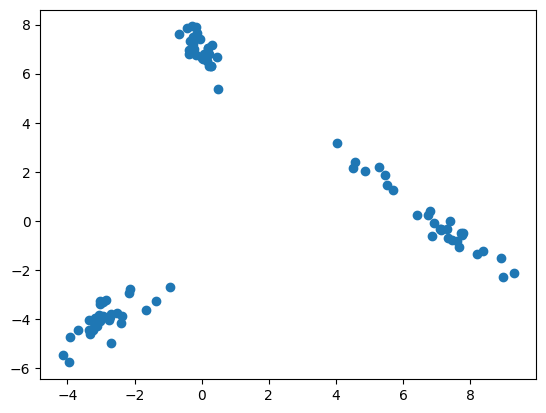

In [34]:
plt.scatter(X[:, 0], X[:, 1])

In [36]:
df = pd.DataFrame(data=X, columns=["X", "Y"])
df

,X,Y
0,-1.372074,-3.294191
1,-0.273269,7.485630
2,-0.291891,7.924806
3,6.859919,-0.611234
4,7.623654,-0.814466
...,...,...
85,5.516887,1.462231
86,4.561149,2.403737
87,5.291648,2.208230
88,7.457766,-0.785509


Ajoutez une colonne `cluster` à votre dataframe dont la valeur sera initialisée aléatoirement par un entier compris entre 0 inclus et k exclus, k étant un paramètre.

In [37]:
len(df)

90

In [39]:
df["cluster"] = np.random.randint(0, 3, len(df))
df

,X,Y,cluster
0,-1.372074,-3.294191,2
1,-0.273269,7.485630,1
2,-0.291891,7.924806,1
3,6.859919,-0.611234,1
4,7.623654,-0.814466,2
...,...,...,...
85,5.516887,1.462231,2
86,4.561149,2.403737,2
87,5.291648,2.208230,0
88,7.457766,-0.785509,1


Générez le dictionnaire `means` dont les clés seront les valeurs de 0 à k exclus et dont les valeurs seront les moyennes des colonnes `x` et `y` pour les données du dataframe dont la valeur de `cluster` sera celle de la clé.

In [44]:
means = {i:i for i in range(3)}

In [46]:


classes = means.keys()

for classe in classes:
    points = df[df["cluster"] == classe]
    means[classe] = (points["X"].mean(), points["Y"].mean())


means

{0: (0.886290821860357, 0.6774412545313604),
 1: (1.4189042901008737, 1.6420641852818825),
 2: (1.5693302726089657, 0.6840792966749529)}

In [47]:
df.groupby('cluster').mean()

,X,Y
cluster,,
0,0.886291,0.677441
1,1.418904,1.642064
2,1.569330,0.684079


Implantez une fonction calculant la distance euclidienne entre deux points

In [52]:
def norm(x1, y1, x2, y2):
    return (np.sqrt((x2-x1)**2 + (y1-y2)**2))

def dist(p1, p2):
    return np.sqrt(np.sum(p1-p2)**2)



,X,Y,cluster,new_cluster
0,-1.372074,-3.294191,2,None
1,-0.273269,7.485630,1,None
2,-0.291891,7.924806,1,None
3,6.859919,-0.611234,1,None
4,7.623654,-0.814466,2,None
...,...,...,...,...
85,5.516887,1.462231,2,None
86,4.561149,2.403737,2,None
87,5.291648,2.208230,0,None
88,7.457766,-0.785509,1,None


Implantez une fonction qui pour un point donné, retourne la clé associée à la moyenne la plus proche

In [94]:
def get_near_mean(p):
    distances = [dist(p , np.array(means[i])) for i in means]
    return np.argmin(distances)

def get_near_means(s):
    return np.apply_along_axis(get_near_mean, axis=1, arr=s)

get_near_mean(np.array([1.569330	, 0.684079]))

2

In [99]:
for i in df[["X", "Y"]].to_numpy():
    print(get_near_mean(i))

0
1
1
1
1
0
1
0
1
0
0
0
0
1
1
1
1
1
1
0
1
0
1
0
0
1
0
1
0
1
1
1
0
1
1
0
1
0
1
1
1
1
1
0
1
1
0
1
1
1
0
1
1
1
0
0
1
1
1
1
1
1
0
1
0
1
0
1
0
1
0
1
1
1
1
1
1
1
0
0
1
1
0
1
1
1
1
1
1
0


Initialisez une nouvelle colonne `new_cluster` dont la valeur sera l'indice de la moyenne la plus proche pour chaque point.

In [100]:
df["new_cluster"] = get_near_means(df[["X", "Y"]].to_numpy())

In [101]:
df

,X,Y,cluster,new_cluster
0,-1.372074,-3.294191,2,0
1,-0.273269,7.485630,1,1
2,-0.291891,7.924806,1,1
3,6.859919,-0.611234,1,1
4,7.623654,-0.814466,2,1
...,...,...,...,...
85,5.516887,1.462231,2,1
86,4.561149,2.403737,2,1
87,5.291648,2.208230,0,1
88,7.457766,-0.785509,1,1


Finalement, implantez l'algorithme des $k$-moyennes en itérant tant que la colonne `new_cluster` est différente de la colonne `cluster`, cette dernière étant mise à jour à chaque itération.

In [ ]:
def compute_mean():
    classes = means.keys()

    for classe in classes:
        points = df[df["cluster"] == classe]
        means[classe] = (points["X"].mean(), points["Y"].mean())

InvalidIndexError: (slice(None, None, None), 0)

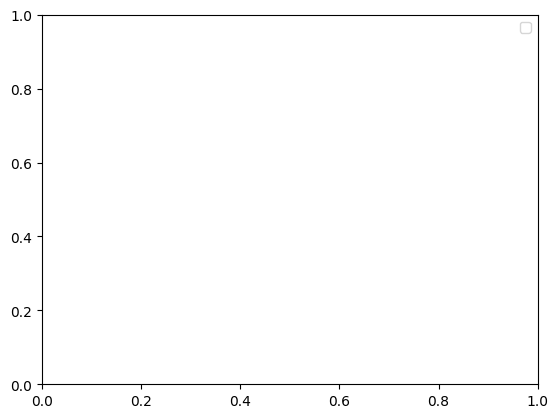

In [105]:
while (df["cluster"]-df["new_cluster"]).sum()== 0:
    df["cluster"] = df["new_cluster"]
    compute_mean()
    df["new_cluster"] = get_near_means(df[["X", "Y"]].to_numpy())

class0 = df[df["cluster"] == 0.0 ]
class1 = df[df["cluster"] == 1.0 ]
class2 = df[df["cluster"] == 2.0 ]

plt.figure()
plt.legend("0")
plt.scatter(class0["X"],class0[])
plt.legend("1")
plt.scatter(class1[:,0],class1[:,1])
plt.legend("2")
plt.scatter(class2[:,0],class2[:,1])

Visualisez le partitionnement réalisé. 

Faites varier les valeurs de $k$.

Appliquez sur d'autres jeux de données que vous génèrerez.

Définissez une fonction qui calcule la somme des distances intra-clusters.